In [1]:
%run -i 'cosim_import.py'
import csv
import multiprocessing

0.post4540.dev0+gde9c276
2.8.0


In [2]:
caseH = 18
ict = True
ecc = False
agc = True

%run -i 'cosim_setup_andes.py'

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.
Working directory: "/Users/jinningwang/Documents/work/andes/jwang/notes"
> Loaded config from file "/Users/jinningwang/.andes/andes.rc"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 8 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.1430 seconds.
Parsing input file "/Users/jinningwang/Documents/work/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.0647 seconds.
System internal structure set up in 0.0230 seconds.


In [6]:
sse0 = ev_ssm(ts=caseH, N=50000, step=1, tp=20,
              lr=0.1, lp=60, seed=2022, name="EVA",
              n_pref=1, is_report=True,
              tt_mean=0.2, tt_var=0.05, tt_lb=0, tt_ub=0.4,
              ict=ict, ecc=ecc, agc=agc)

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 


In [7]:
%run -i 'cosim_setup_dispatch.py'

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0825 seconds.
0: |F(x)| = 9.601680411
1: |F(x)| = 3.49745641
2: |F(x)| = 0.1830766445
3: |F(x)| = 0.0007183028649
4: |F(x)| = 1.659287863e-08
Converged in 5 iterations in 0.0041 seconds.
Power flow results are consistent. Conversion is successful.


Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-08


-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0044 seconds.
0: |F(x)| = 9.601680411
1: |F(x)| = 3.49745641
2: |F(x)| = 0.1830766445
3: |F(x)| = 0.0007183028649
4: |F(x)| = 1.659287863e-08
Converged in 5 iterations in 0.0043 seconds.
Power flow results are consistent. Conversion is successful.
GSF is consistent.
RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=4889.131


pp cost=2184.5741560778906, gb cost=4889.131241556355


In [8]:
%run -i 'cosim_linktable.py'

# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 1.0, 1.0, 0.04

# Define functions and constants used in loop
%run -i 'cosim_const.py'

In [9]:
# SFR, with ict control
socf1 = pd.read_csv('cosim_18_F_ict_evsoc1.csv')
socf2 = pd.read_csv('cosim_18_F_ict_evsoc2.csv')
socfm = pd.concat([socf1, socf2], axis=0).reset_index(drop=True)

# SFR, without ict control
socfn1 = pd.read_csv('cosim_18_F_evsoc1.csv')
socfn2 = pd.read_csv('cosim_18_F_evsoc2.csv')
socfnm = pd.concat([socfn1, socfn2], axis=0).reset_index(drop=True)

# no SFR
socs1 = pd.read_csv('cosim_18_S_evsoc1.csv')
socs2 = pd.read_csv('cosim_18_S_evsoc2.csv')
socsm = pd.concat([socs1, socs2], axis=0).reset_index(drop=True)

pgf = pd.read_csv('cosim_18_F_ict_pg.csv')
pgs = pd.read_csv('cosim_18_S_pg.csv')
pgfn = pd.read_csv('cosim_18_F_pg.csv')

agcf = pd.read_csv('cosim_18_F_ict_agcm.csv')
agcs = pd.read_csv('cosim_18_S_agcm.csv')
agcfn = pd.read_csv('cosim_18_F_agcm.csv')

outf = pd.read_csv('cosim_18_F_ict_out.csv')
outs = pd.read_csv('cosim_18_S_out.csv')
outfn = pd.read_csv('cosim_18_F_out.csv')
outf['fd'] = outf['freq'] - ssa.config.freq
outs['fd'] = outs['freq'] - ssa.config.freq
outfn['fd'] = outfn['freq'] - ssa.config.freq

evf = pd.read_csv('cosim_18_F_ict_sse.csv')
evs = pd.read_csv('cosim_18_S_sse.csv')
evfn = pd.read_csv('cosim_18_F_sse.csv')
evdf = pd.read_csv('cosim_18_F_ict_evdata.csv')
evds = pd.read_csv('cosim_18_S_evdata.csv')
evdfn = pd.read_csv('cosim_18_F_evdata.csv')

sfrf = pd.read_csv('cosim_18_F_ict_sfr.csv')
sfrs = pd.read_csv('cosim_18_S_sfr.csv')
sfrfn = pd.read_csv('cosim_18_F_sfr.csv')

evagcf = pd.read_csv('cosim_18_F_ict_evagc.csv').T
evsocf = socfm.T
evsocf.sort_values(by=['0'], axis=1, inplace=True)
evagcs = pd.read_csv('cosim_18_S_evagc.csv').T
evsocs = socsm.T
evsocs.sort_values(by=['0'], axis=1, inplace=True)
evagcfn = pd.read_csv('cosim_18_F_evagc.csv').T
evsocfn = socfnm.T
evsocfn.sort_values(by=['0'], axis=1, inplace=True)

reader = csv.reader(open('cosim_18_F_ict_rted.csv', 'r'))
rted_res = {}
for row in reader:
   k, v = row
   rted_res[k] = v

ANDES total load is: 58.564 p.u.


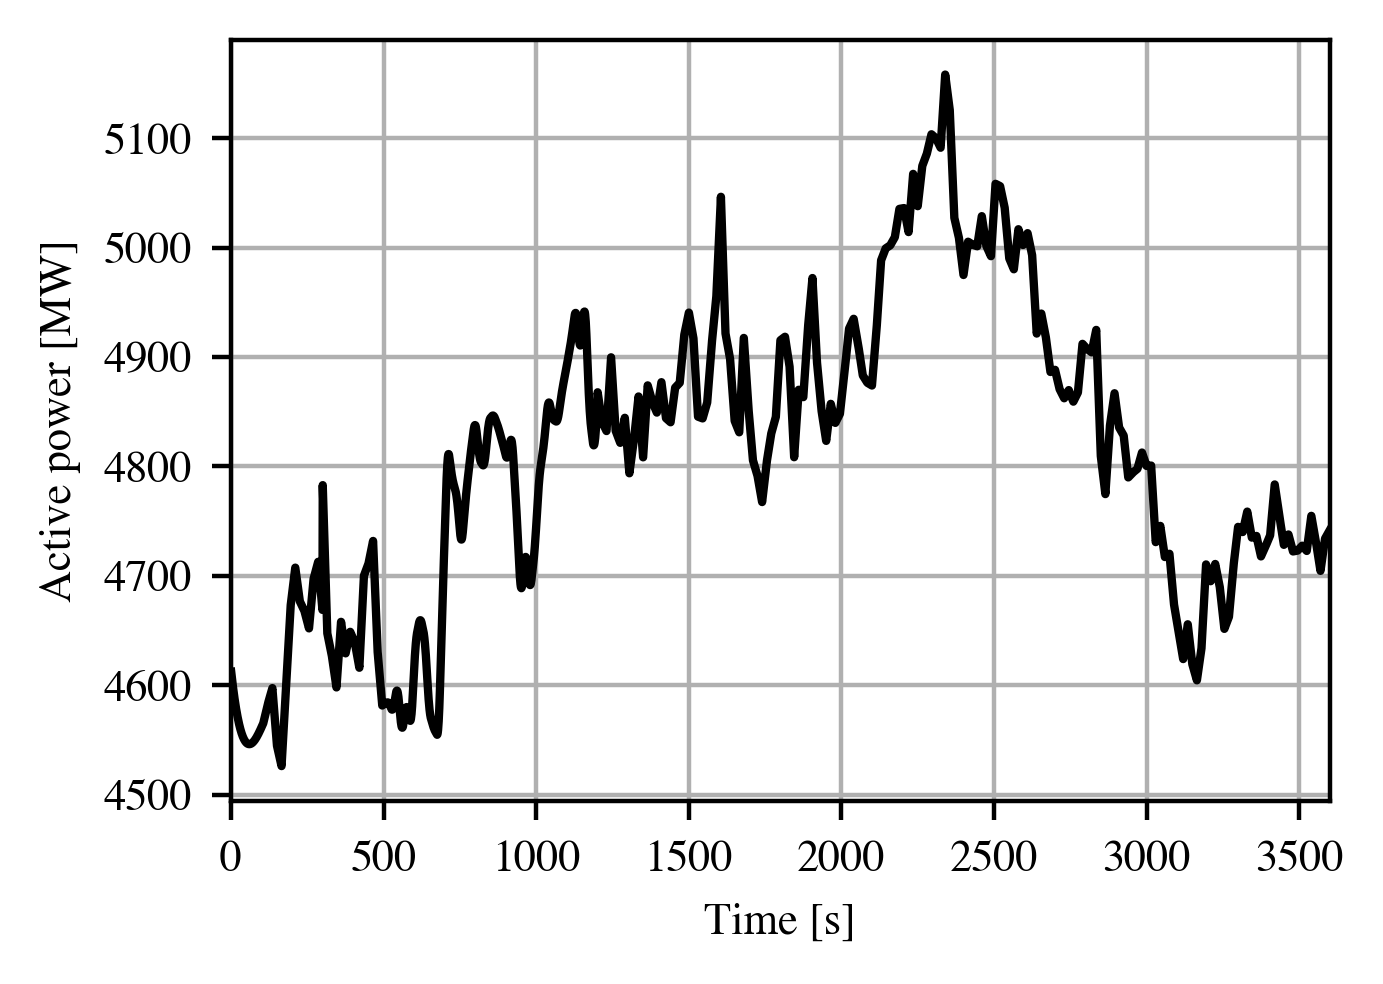

In [10]:
ptotal = ssa.PQ.as_df()['p0'].sum()
print('ANDES total load is:',ptotal.round(4),'p.u.')

# --- scale load curve ---
ddata_path = '/case/dsyn.csv'
ddata = dir_path + ddata_path
d_syn = pd.read_csv(ddata)

caseH = 18

np.random.seed(2022)
col = ['h10', 'h18', 'a10', 'a18']
col1 = ['h10', 'h18']
col2 = ['a10', 'a18']
# d_syn['a10'].iloc[200:650] *= 0.5
d_syn[col1] = (d_syn[col1] - d_syn[col1].min()) / d_syn[col1].min() + 0.8
d_syn[col2] = (d_syn[col2] - d_syn[col2].mean()) / (d_syn[col2].max() - d_syn[col2].min())

if caseH == 10:
    k = 0.4  # the coefficient can be adjusted to fit the case
    d_syn['s10'] = d_syn['h10'] + k * d_syn['a10']
    d_syn['s18'] = d_syn['h18'] + k * d_syn['a18']
    d_syn['sload'] = d_syn['s10']
    # d_syn['sload'] = d_syn['sload'].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)
    # d_syn['sload'].iloc[0:310] -= 0.05 * k / 0.3
    # # d_syn['sload'].iloc[250:350] = None
    # # d_syn['sload'].iloc[250:350].interpolate(method='polynomial', order=3, inplace=True)
    # d_syn['sload'].iloc[400:650] += 2 * (0.8 - d_syn['sload'].iloc[300:600])
    # d_syn['sload'].iloc[600:900] += 0.02 * k / 0.3
    # # d_syn['sload'].iloc[450:650] = None
    # # d_syn['sload'].iloc[450:650].interpolate(method='polynomial', order=9, inplace=True)
    # d_syn['sload'].iloc[900:1200] += 0.03 * k / 0.3
    # d_syn['sload'].iloc[1200:1800] -= 0.06 * k / 0.3
    # d_syn['sload'].iloc[2100:2400] += 0.02 * k / 0.3
    # d_syn['sload'].iloc[2700:3000] -= 0.03 * k / 0.3
    # d_syn['sload'].iloc[3300:3600] += 0.05 * k / 0.3
if caseH == 18:
    k = 0.1  # the coefficient can be adjusted to fit the case
    d_syn['s10'] = d_syn['h10'] + k * d_syn['a10']
    d_syn['s18'] = d_syn['h18'] + k * d_syn['a18']
    d_syn['sload'] = d_syn['s18']
    d_syn['sload'].iloc[0:300] -= 0.2 * k
    d_syn.loc[500:1200, 'sload'] = d_syn['sload'].iloc[500:1200].rolling(10).mean()
#     d_syn['sload'] = d_syn['sload'].rolling(80).mean()

    # d_syn['sload'] = d_syn['sload'].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)
    # d_syn['sload'].iloc[100:600] = d_syn['sload'].iloc[100:600].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)

avg = d_syn['sload'].rolling(70).mean()
    
# calculate expected load
step = 300
d_exp = d_syn.groupby(d_syn.index // step).mean().copy()
d_exp['time'] = range(0,3600,300)

# align starting point of load with starting point of dispatch results
d_syn['sload'][0] = d_exp['sload'].iloc[0]
d_syn['sload'][1:100] = None
d_syn['sload'] = d_syn['sload'].interpolate(method='polynomial', order=3)

plt.style.use('ieee')
# --- plot load curve ---
fig_load, ax_load = plt.subplots(figsize=(3.5, 2.5), dpi=400)
ax_load.plot(d_syn['time'], ptotal * ssa.config.mva * d_syn['sload'], linestyle='-')
ax_load.set_xlim([0, 3600])
ax_load.set_ylabel('Active power [MW]')
ax_load.set_xlabel('Time [s]')
# ax_load.set_title('Figure. Load profile', fontsize=12, x=0, y=-0.4)
ax_load.grid()
plt.tight_layout()
# fig_load.savefig("load_curve.png", bbox_inches="tight")

/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_23546/803198328.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_23546/803198328.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
/var/folders/06/z8ws9b2d733f7h6yc5qpn22w0000gn/T/ipykernel_23546/803198328.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


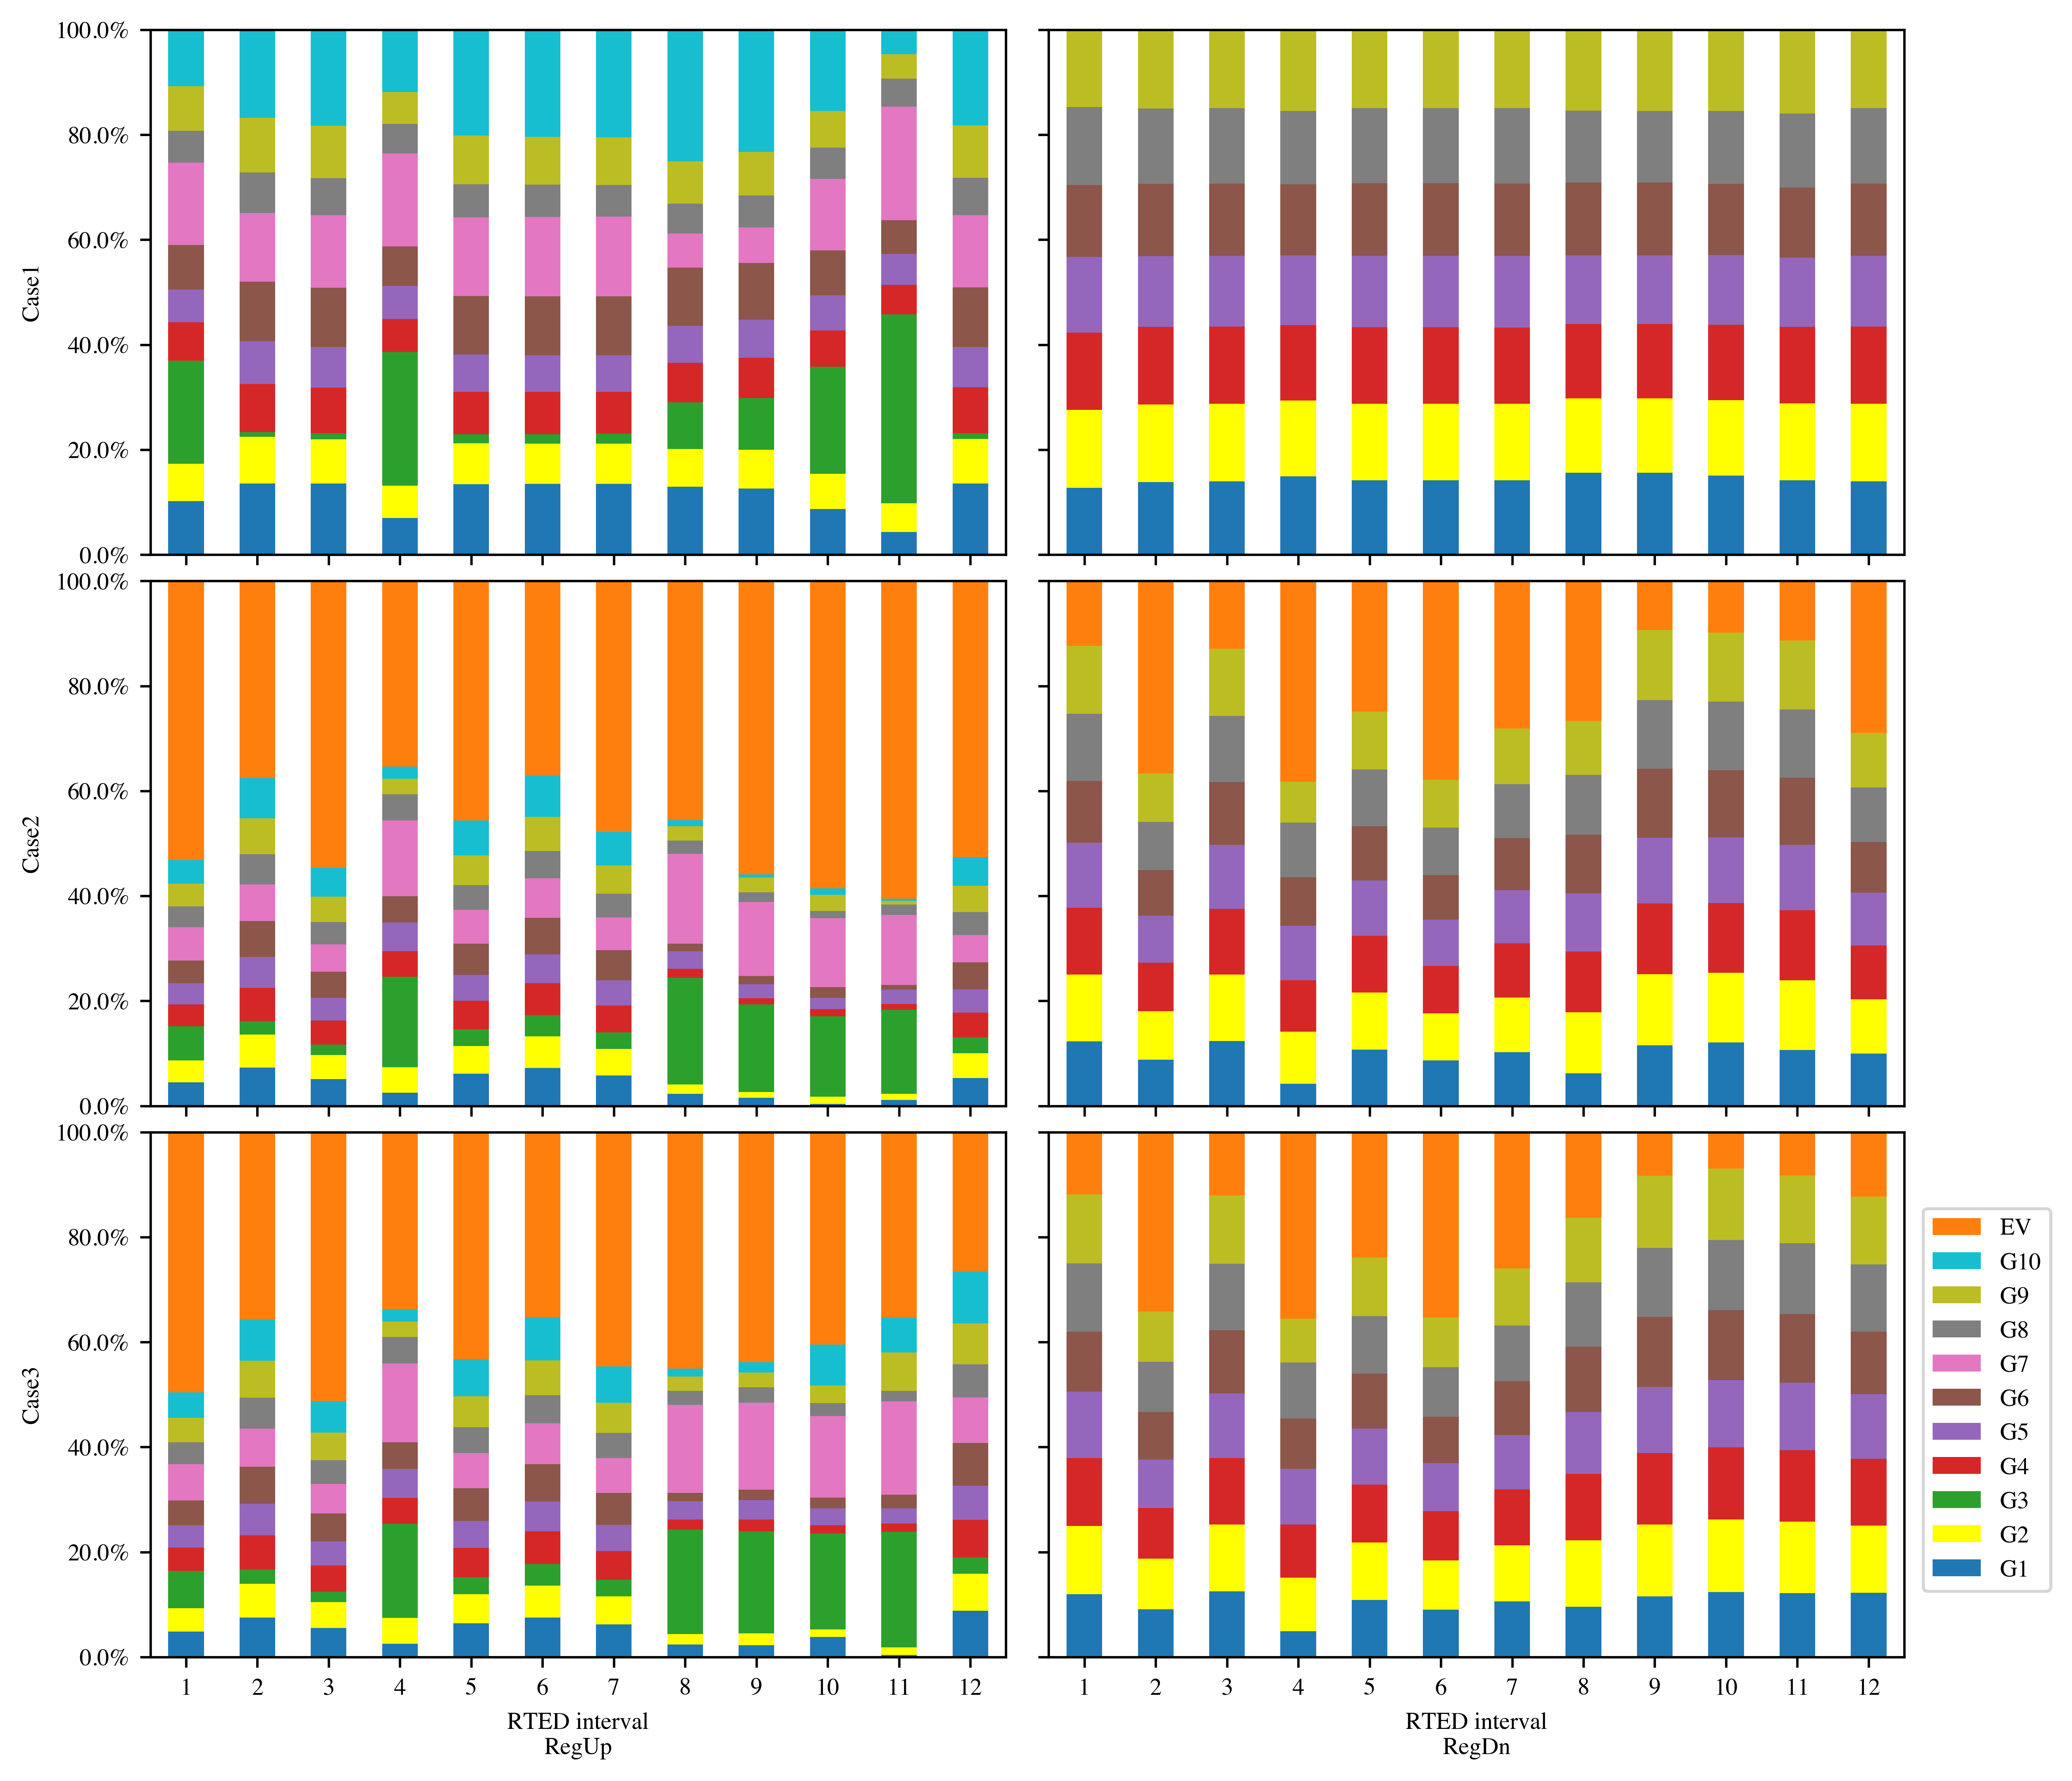

In [11]:
color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']

def bf_plot(case_idx, bu_df, bd_df, ax1, ax2,
            new_cols=new_cols, label_g=label_g):
    bu_df[new_cols].plot.bar(stacked=True, ax=ax1, legend=False, color=color)
    bd_df[new_cols].plot.bar(stacked=True, ax=ax2, legend=False, color=color)
    for ax in [ax1, ax2]:
        ax.tick_params(axis='x', labelrotation = 0)
        ax.set_ylim([0, 1])
        ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
        ax.set_xticklabels([i for i in range(1,13,1)])
    return True

bu_dfs = pd.read_csv('cosim_18_S_bu.csv')
bd_dfs = pd.read_csv('cosim_18_S_bd.csv')
bu_dffn = pd.read_csv('cosim_18_F_bu.csv')
bd_dffn = pd.read_csv('cosim_18_F_bd.csv')
bu_dff = pd.read_csv('cosim_18_F_ict_bu.csv')
bd_dff = pd.read_csv('cosim_18_F_ict_bd.csv')

figs, axes = plt.subplots(3, 2, figsize=(10.5, 10), sharey='row', sharex='col')
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.05, hspace=0.05)

bf_plot(new_cols=new_cols, ax1=axes[0, 0], ax2=axes[0, 1], case_idx=1, bu_df=bu_dfs, bd_df=bd_dfs)
bf_plot(new_cols=new_cols, ax1=axes[1, 0], ax2=axes[1, 1],  case_idx=2, bu_df=bu_dffn, bd_df=bd_dffn)
bf_plot(new_cols=new_cols, ax1=axes[2, 0], ax2=axes[2, 1],  case_idx=3, bu_df=bu_dff, bd_df=bd_dff)

axes[2, 0].set_xlabel('RTED interval\nRegUp')
axes[2, 1].set_xlabel('RTED interval\nRegDn')

axes[0, 0].set_ylabel('Case1')
axes[1, 0].set_ylabel('Case2')
axes[2, 0].set_ylabel('Case3')

lines_labels = [ax.get_legend_handles_labels() for ax in [axes[2, 0], axes[2, 1]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g.reverse()
figs.legend(line_plot, label_g,
            loc='lower right', bbox_to_anchor=(0.47, 0.15, 0.5, 0.5))
# figs.suptitle('Balancing factor', x=0.12, y=0.07, fontsize=12)

In [12]:
# --- CPS score ---
epsilon = 18
k = 10 * ssa.ACEc.bias.v / epsilon / epsilon # mHz
length = 60

def cps_calc(df, k=k, length=length):
    """Calculate CPS score"""
    dfc = df.copy()
    dfc['Time'] = dfc['Time'] / length
    dfc['Time'] = dfc['Time'].astype(int)
    dfc = dfc.groupby('Time').mean()
    dfc['prod'] = 100 * (2 - k * dfc['ACE'] * dfc['fd'])
    return dfc

outscp = cps_calc(outs)
outfncp = cps_calc(outfn)
outfcp = cps_calc(outf)

# --- generation cost ---
def genc_calc(pgdf):
    """Calculate gen cost"""
    tc = 0
    for i in pgf.index:
        c = ssd.cost.c2.values * np.power(pgdf.loc[i].values / 12, 2) \
            + ssd.cost.c1.values * pgdf.loc[i].values
        tc += np.sum(c)
    tc += ssd.cost.c0.values * ssd.gen.u.values
    return tc.sum()

gtf = genc_calc(pgf)
gts = genc_calc(pgs)
gtfn = genc_calc(pgfn)

# --- SFR mileage cost ---
def sfrc_calc(agcf):
    """Calculate SFR mileage payment"""
    tc = 0
    for i in agcf.columns:
        c = agcf[i].values * 0.5  # $3/MWh
        tc += np.sum(c)
    return tc.sum()

sms = sfrc_calc(agcs)
smfn = sfrc_calc(agcfn)
smf = sfrc_calc(agcf)

res_value = np.array([[outs['fd'].std(), outfn['fd'].std(), outf['fd'].std()],
                      [outs['ACE'].std(), outfn['ACE'].std(), outf['ACE'].std()],
                      [outscp['prod'].mean(), outfncp['prod'].mean(), outfcp['prod'].mean()],
                      [agcs.sum().sum(), agcfn.sum().sum(), agcf.sum().sum()],
                      [agcs.loc[9].sum(), agcfn.loc[9].sum(), agcf.loc[9].sum()],
                      [gts, gtfn, gtf],
                      [sms, smfn, smf]])
res_df = pd.DataFrame(data=res_value,
                      columns=['Case1', 'Case2', 'Case3'],
                      index=['FreqD', 'ACED', 'CPS1', 'TotalM', 'EVM', 'GenC', 'MileP'])
res_df.loc['TotC'] = res_df.loc['GenC'] + res_df.loc['MileP']
res_df.round(5)
# TODO: AGC COST

Case1         Case2         Case3
FreqD        0.00622       0.00597       0.00603
ACED        21.76399      20.88402      21.06546
CPS1       153.15652     157.54103     156.36773
TotalM    8275.57265    8967.43229    8877.22690
EVM          0.00000    2120.14597    1805.99755
GenC    133007.71014  132290.40125  132535.78893
MileP     4137.78632    4483.71614    4438.61345
TotC    137145.49646  136774.11740  136974.40238

Text(0, 0.5, 'Total AGC control [MW]')

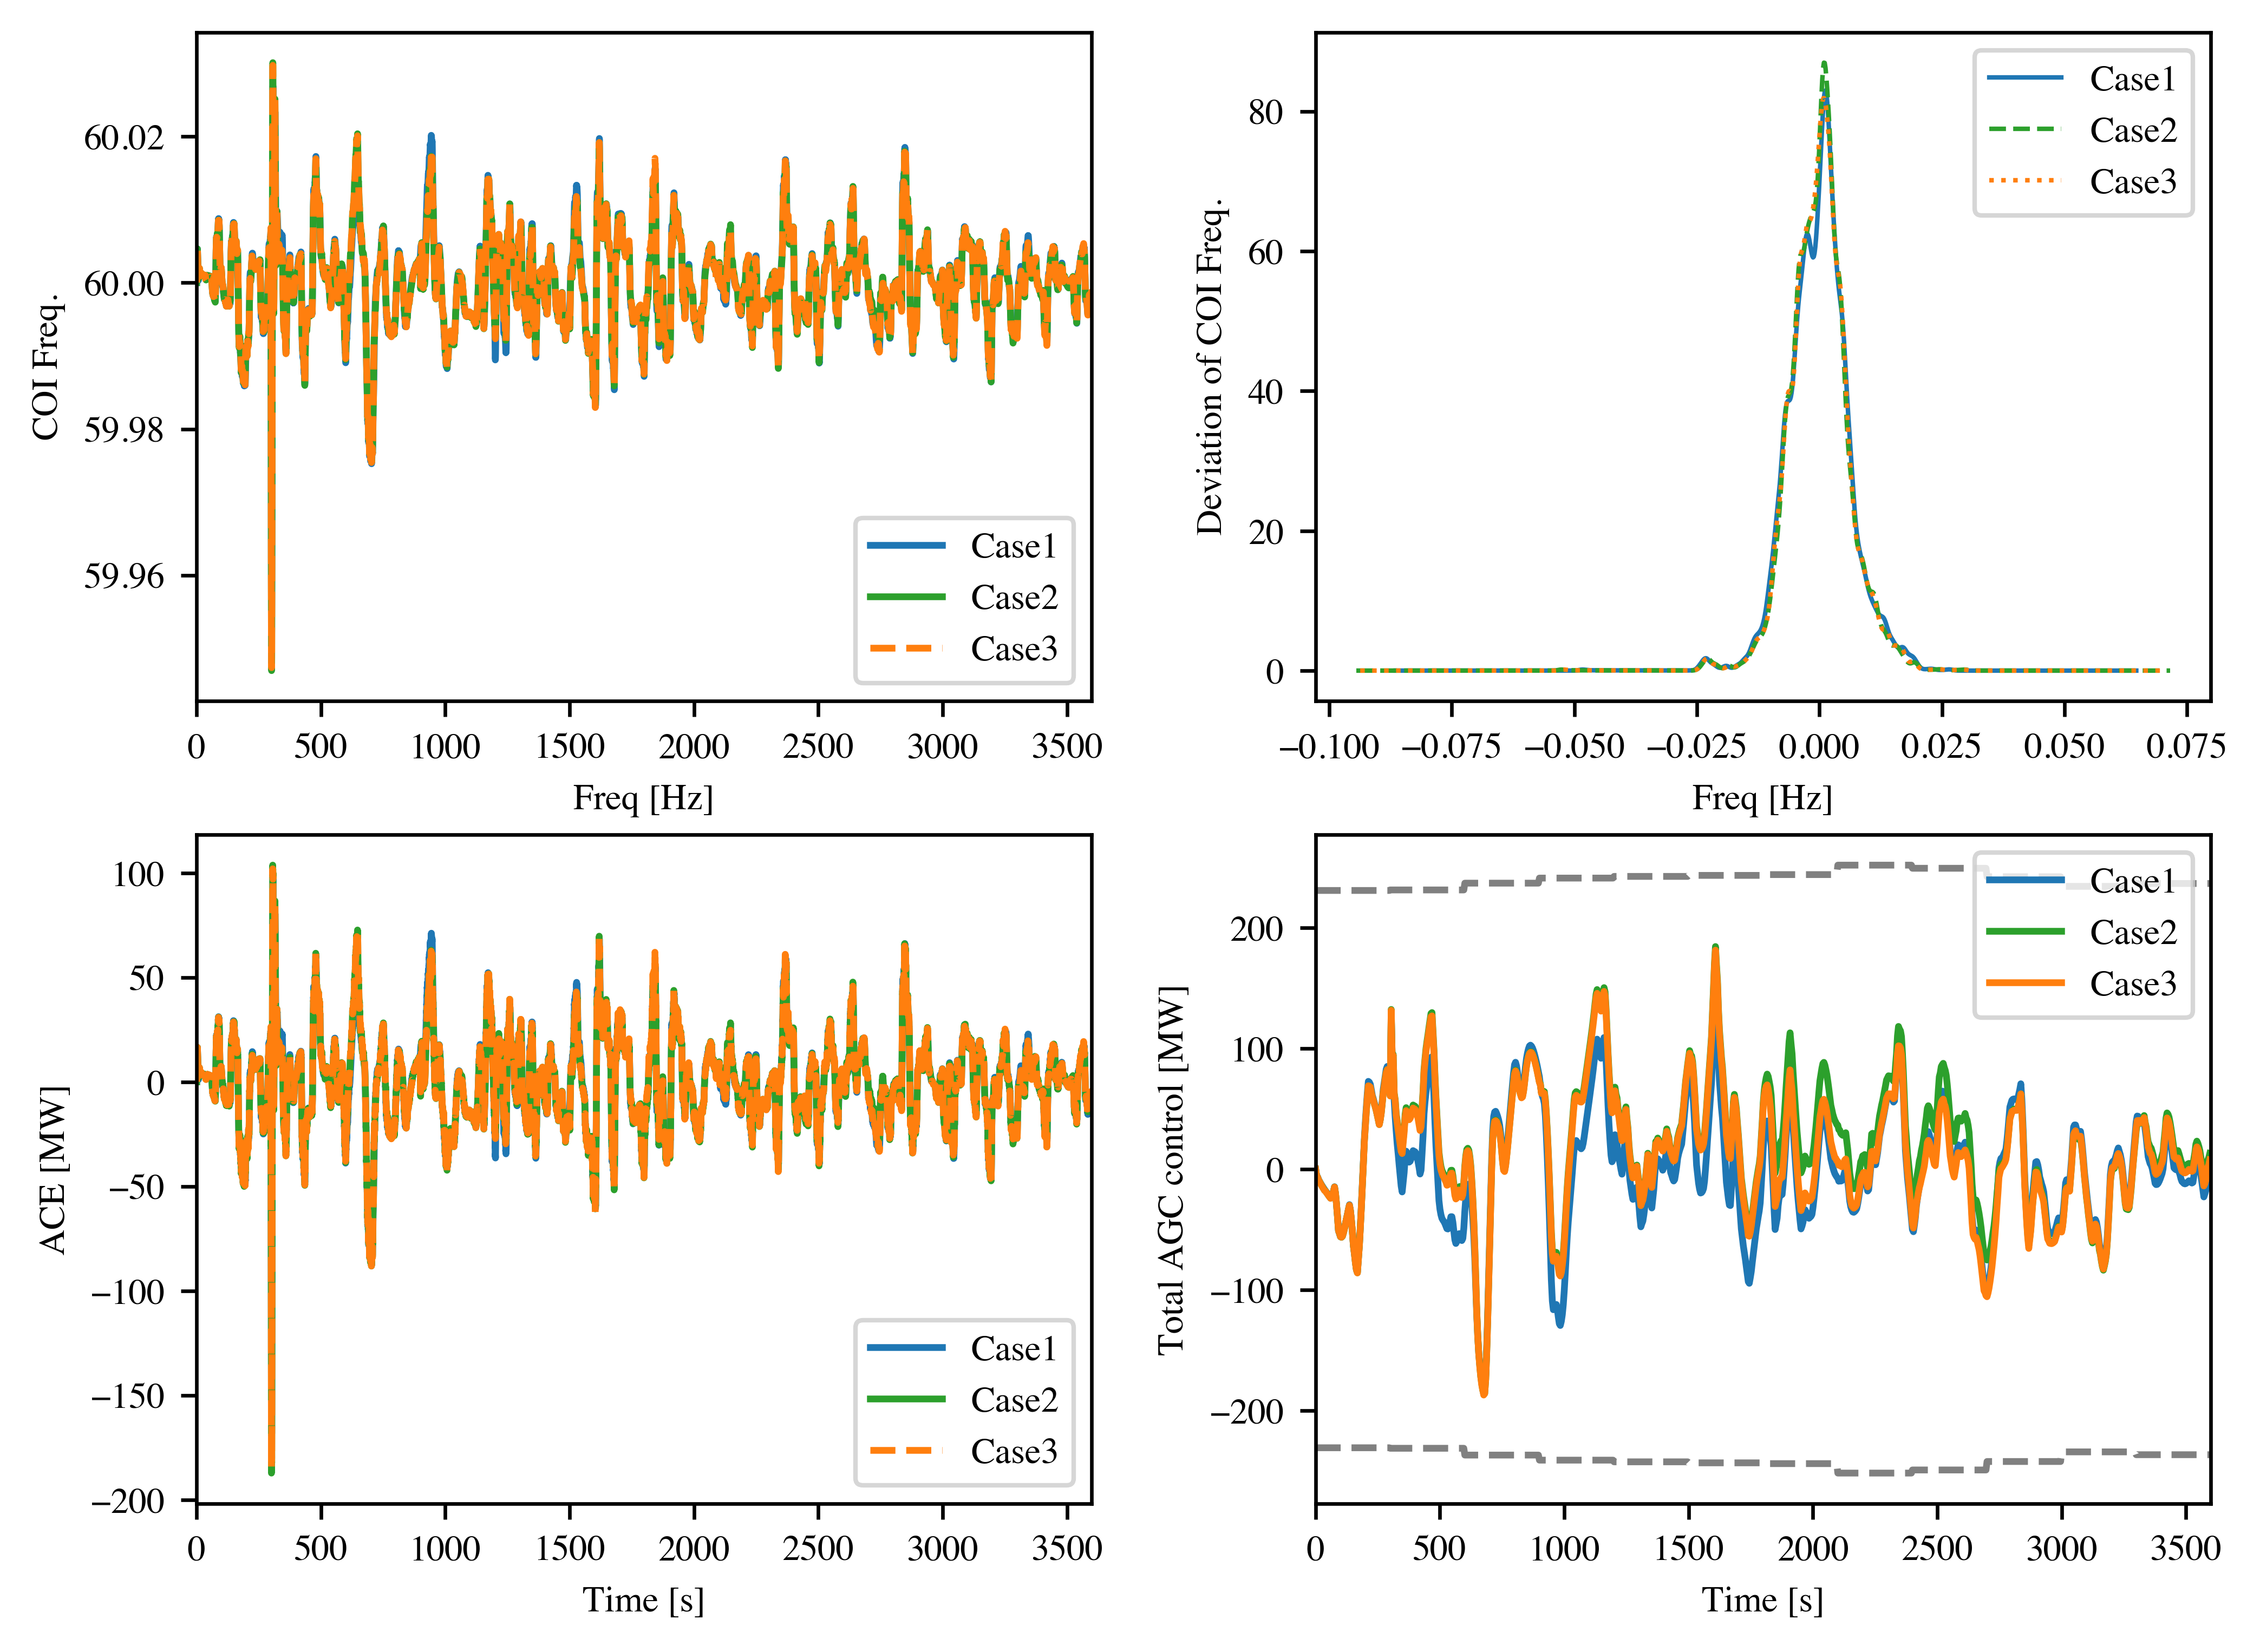

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.25, hspace=None)

# COI freq.
x, y, fig, ax_plt = 'Time', 'freq', fig, ax[0, 0]
outs.plot(x='Time', y='freq', ax=ax_plt, fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='freq', ax=ax_plt, fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='freq', ax=ax_plt, fig=fig, label='Case3', linestyle='--', color='tab:orange')
ax_plt.legend()
ax_plt.set_xlim([0, 3600])
ax_plt.set_ylabel('COI Freq.')
ax_plt.set_xlabel('Freq [Hz]')

# COI std.
x, y, kind, legend, linewidth, fig, ax_plt = 'Time', 'fd', 'kde', False, 1, fig, ax[0, 1]
outs.plot(x=x, y=y, kind=kind, color='tab:blue', alpha=1,
          legend=legend, linewidth=linewidth, fig=fig, ax=ax_plt, label='Case1')
outfn.plot(x=x, y=y, kind='kde', color='tab:green', alpha=1,
          legend=legend, linewidth=linewidth, fig=fig, ax=ax_plt, label='Case2')
outf.plot(x=x, y=y, kind=kind, color='tab:orange', alpha=1,
          legend=legend, linewidth=linewidth, fig=fig, ax=ax_plt, label='Case3')
ax_plt.legend()
ax_plt.set_ylabel('Deviation of COI Freq.')
ax_plt.set_xlabel('Freq [Hz]')

# ACE
x, y, fig, ax_plt = 'Time', 'ACE', fig, ax[1, 0]
outs.plot(x=x, y=y, ax=ax_plt, fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x=x, y=y, ax=ax_plt, fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x=x, y=y, ax=ax_plt, fig=fig, label='Case3', linestyle='--', color='tab:orange')
ax_plt.legend()
ax_plt.set_xlim([0, 3600])
ax_plt.set_ylabel('ACE [MW]')
ax_plt.set_xlabel('Time [s]')

# AGC control
x, y, kind, legend, linewidth, fig, ax_plt = 'Time', 'fd', 'kde', False, 1, fig, ax[1, 1]
sfrs.plot(x='time', y='ace', ax=ax_plt, fig=fig, label='Case1', linestyle='-', color='tab:blue')
sfrfn.plot(x='time', y='ace', ax=ax_plt, fig=fig, label='Case2', linestyle='-', color='tab:green')
sfrf.plot(x='time', y='ace', ax=ax_plt, fig=fig, label='Case3', linestyle='-', color='tab:orange')

legend, linestyle, color = False, '--', 'grey'
sfrs.plot(x='time', y='up', ax=ax_plt, fig=fig, linestyle=linestyle, color=color, legend=legend)
sfrs.plot(x='time', y='dn', ax=ax_plt, fig=fig, linestyle=linestyle, color=color, legend=legend)
ax_plt.set_xlim([0, 3600])
ax_plt.set_xlabel('Time [s]')
ax_plt.set_ylabel('Total AGC control [MW]')
# fig.suptitle('System dynamic results', x=0.18, y=0.05, fontsize=12)

Text(0.5, -0.23, 'Case3')

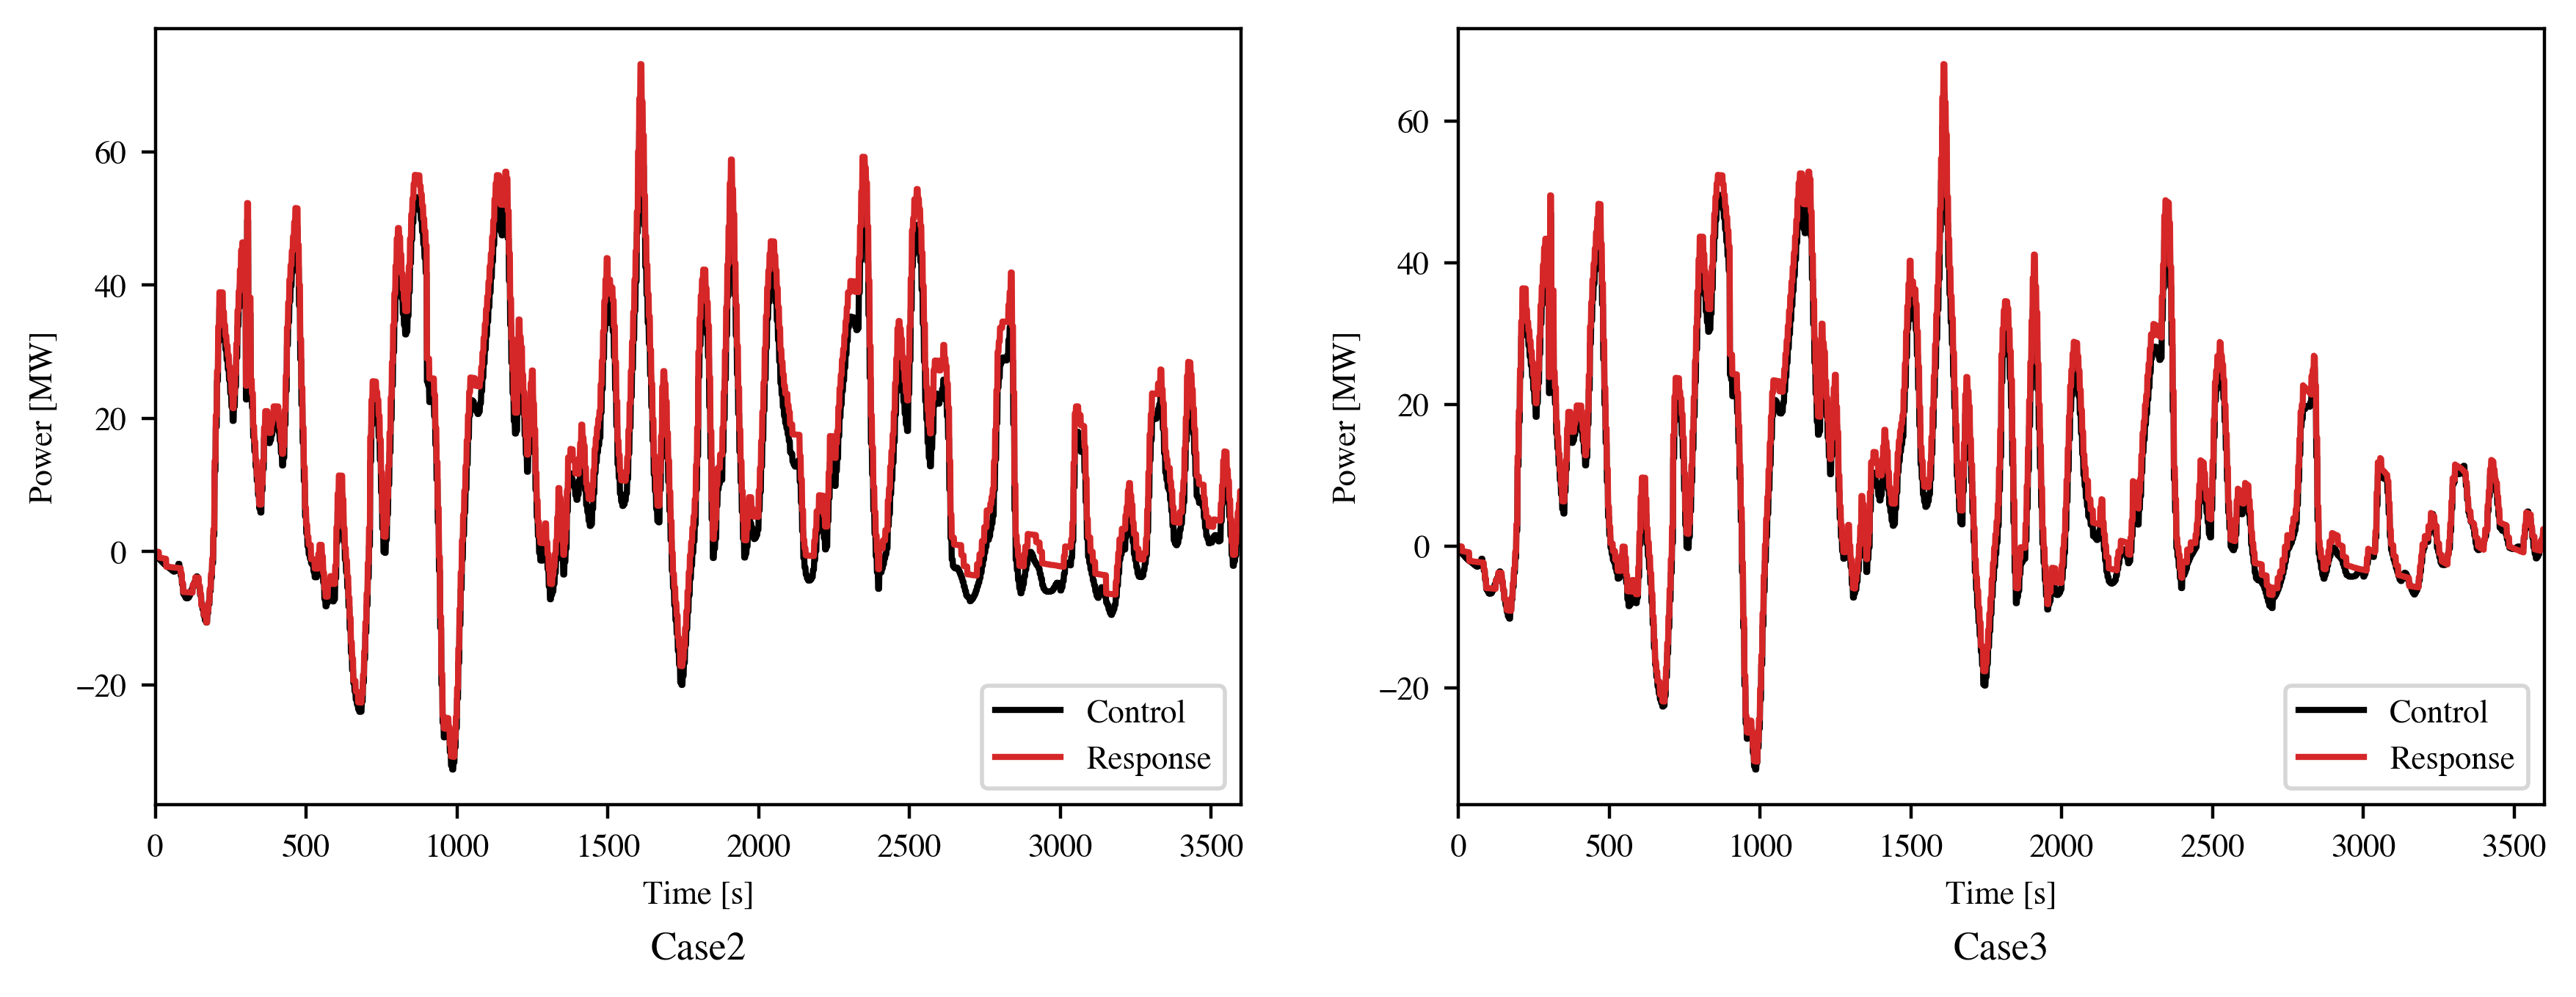

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10.5, 3.5), dpi=400, sharey=False)
loc = 'lower right'
evfn.plot(y='Pi', ax=ax[0], color='black', label='Control')
evfn.plot(y='Prc', ax=ax[0], color='tab:red', linestyle='-', label='Response')
evf.plot(y='Pi', ax=ax[1], color='black', linestyle='-', label='Control')
evf.plot(y='Prc', ax=ax[1], color='tab:red', linestyle='-', label='Response')
for a in ax:
    a.set_xlim([0, 3600])
    a.legend(loc=loc)
    a.set_ylabel('Power [MW]')
    a.set_xlabel('Time [s]')

ax[0].set_title('Case2', y=-0.23)
ax[1].set_title('Case3', y=-0.23)
# fig.suptitle('EV aggregator response', x=0.16, y=-0.04, fontsize=12)

/Users/jinningwang/Documents/work/mambaforge/envs/andes/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


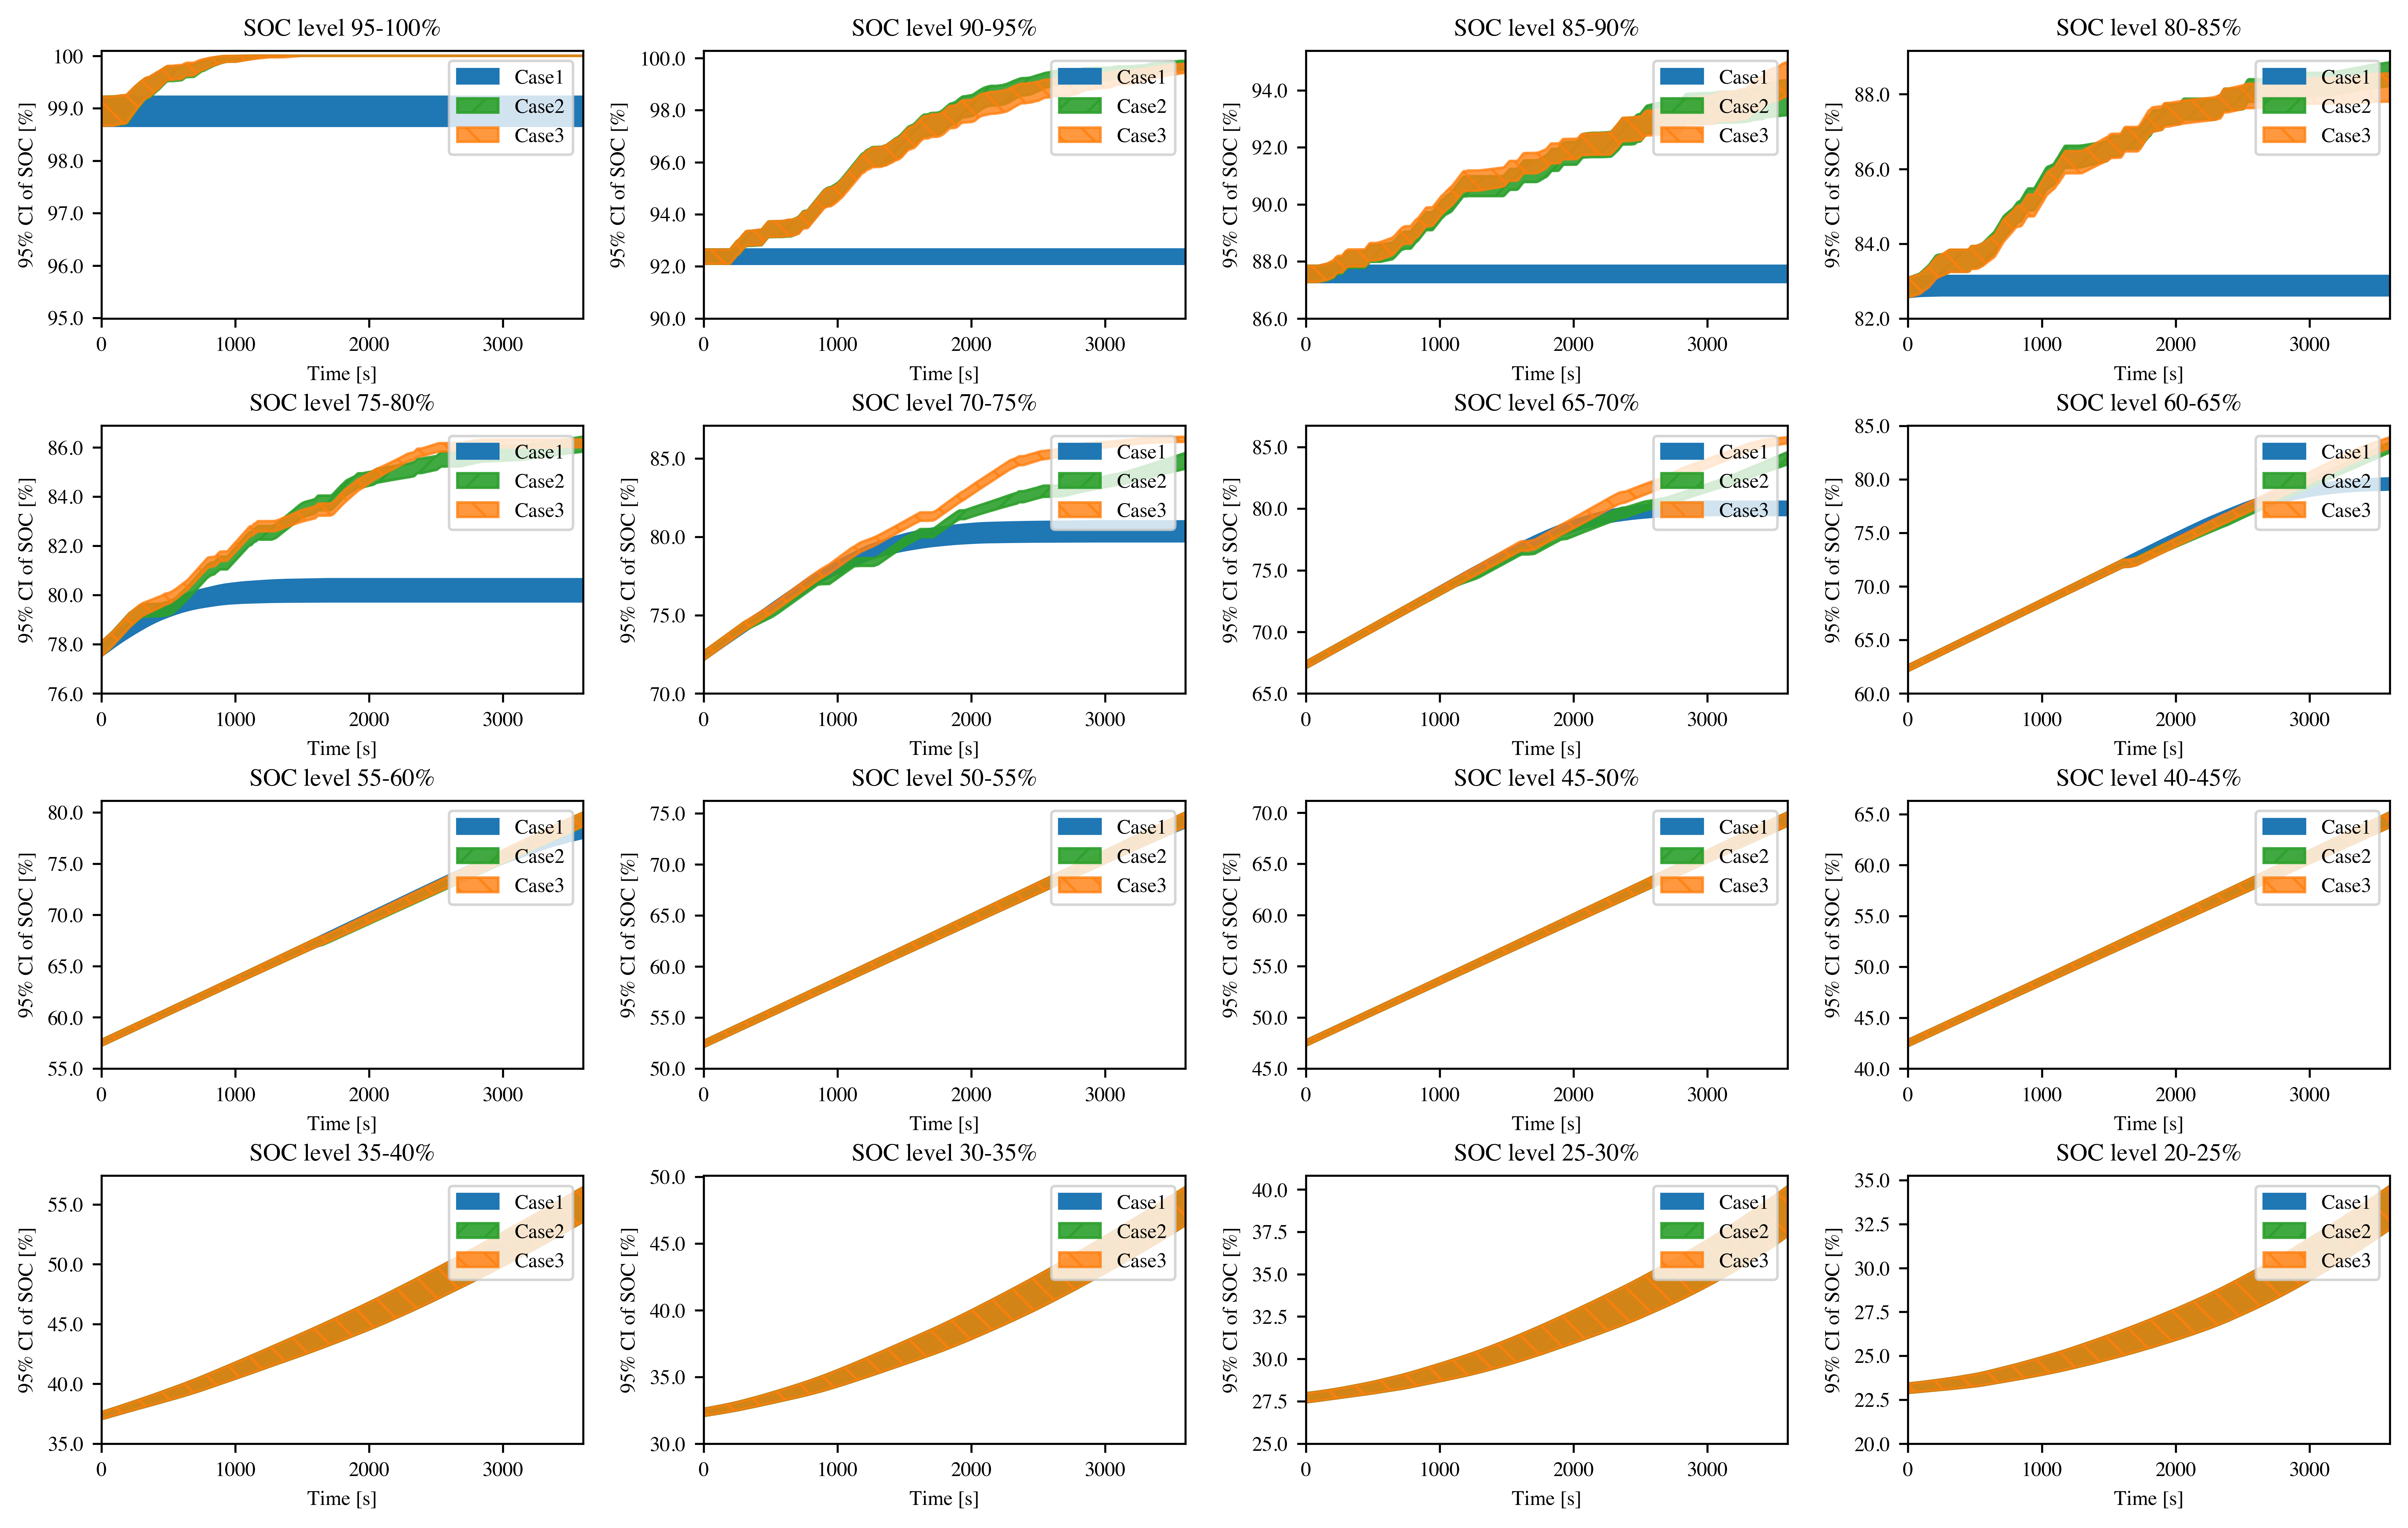

In [15]:
col_index = []
for k in range(0, 16):
    col_index = col_index + [list(np.array(range(0, 100)) + 100*k)]
col = []
for c in col_index:
    col = col + [list(evsocf.columns[[c]].values)]

fig, ax = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.25, hspace=0.4)

alpha=0.8
for i in range(4):
    for j in range(4):
        idx = 15 - (4*i + j)
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:blue', hatch='||', alpha=1, label=f'Case1',
                              y1=evsocs[col[idx]].mean(axis=1) + 1.96 * evsocs[col[idx]].sem(axis=1),
                              y2=evsocs[col[idx]].mean(axis=1) - 1.96 * evsocs[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:green', hatch='//', alpha=0.9, label=f'Case2',
                              y1=evsocfn[col[idx]].mean(axis=1) + 1.96 * evsocfn[col[idx]].sem(axis=1),
                              y2=evsocfn[col[idx]].mean(axis=1) - 1.96 * evsocfn[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:orange', hatch='\\\\', alpha=0.8, label=f'Case3',
                              y1=evsocf[col[idx]].mean(axis=1) + 1.96 * evsocf[col[idx]].sem(axis=1),
                              y2=evsocf[col[idx]].mean(axis=1) - 1.96 * evsocf[col[idx]].sem(axis=1))
        ax[i, j].legend()
        ax[i, j].set_xlim([0, 3600])
        ax[i, j].set_xlabel('Time [s]')
        ax[i, j].set_ylabel('95% CI of SOC [%]')
        yticks = list(ax[i, j].get_yticks())
        yy = ax[i, j].set_yticks(yticks[0:-1], [np.round(ytk*100, 4) for ytk in yticks[0:-1]])
        ax[i, j].set_title(f'SOC level {idx*5+20}-{idx*5+25}%')

ax[0, 0].set_ylim([0.9499, 1.001])
yy = ax[0, 0].set_yticks([0.95, 0.96, 0.97, 0.98, 0.99, 1],
                         [np.round(ytk*100, 4) for ytk in [0.95, 0.96, 0.97, 0.98, 0.99, 1]])

# fig.suptitle('EV SOC trends', x=0.14, y=0.08, fontsize=16)
# ax[0, 1].set_ylim([0.899, 0.9501])
# ax[0, 1].set_yticks([0.9, 0.91, 0.92, 0.93, 0.94, 0.95],[np.round(ytk*100, 4) for ytk in [0.9, 0.91, 0.92, 0.93, 0.94, 0.95]])
# ax[0, 2].set_ylim([0.849, 0.901])
# ax[0, 2].set_yticks([0.85, 0.86, 0.87, 0.88, 0.89, 0.9], [np.round(ytk*100, 4) for ytk in [0.85, 0.86, 0.87, 0.88, 0.89, 0.9]])

Text(0.5, -0.22, 'd. Case3')

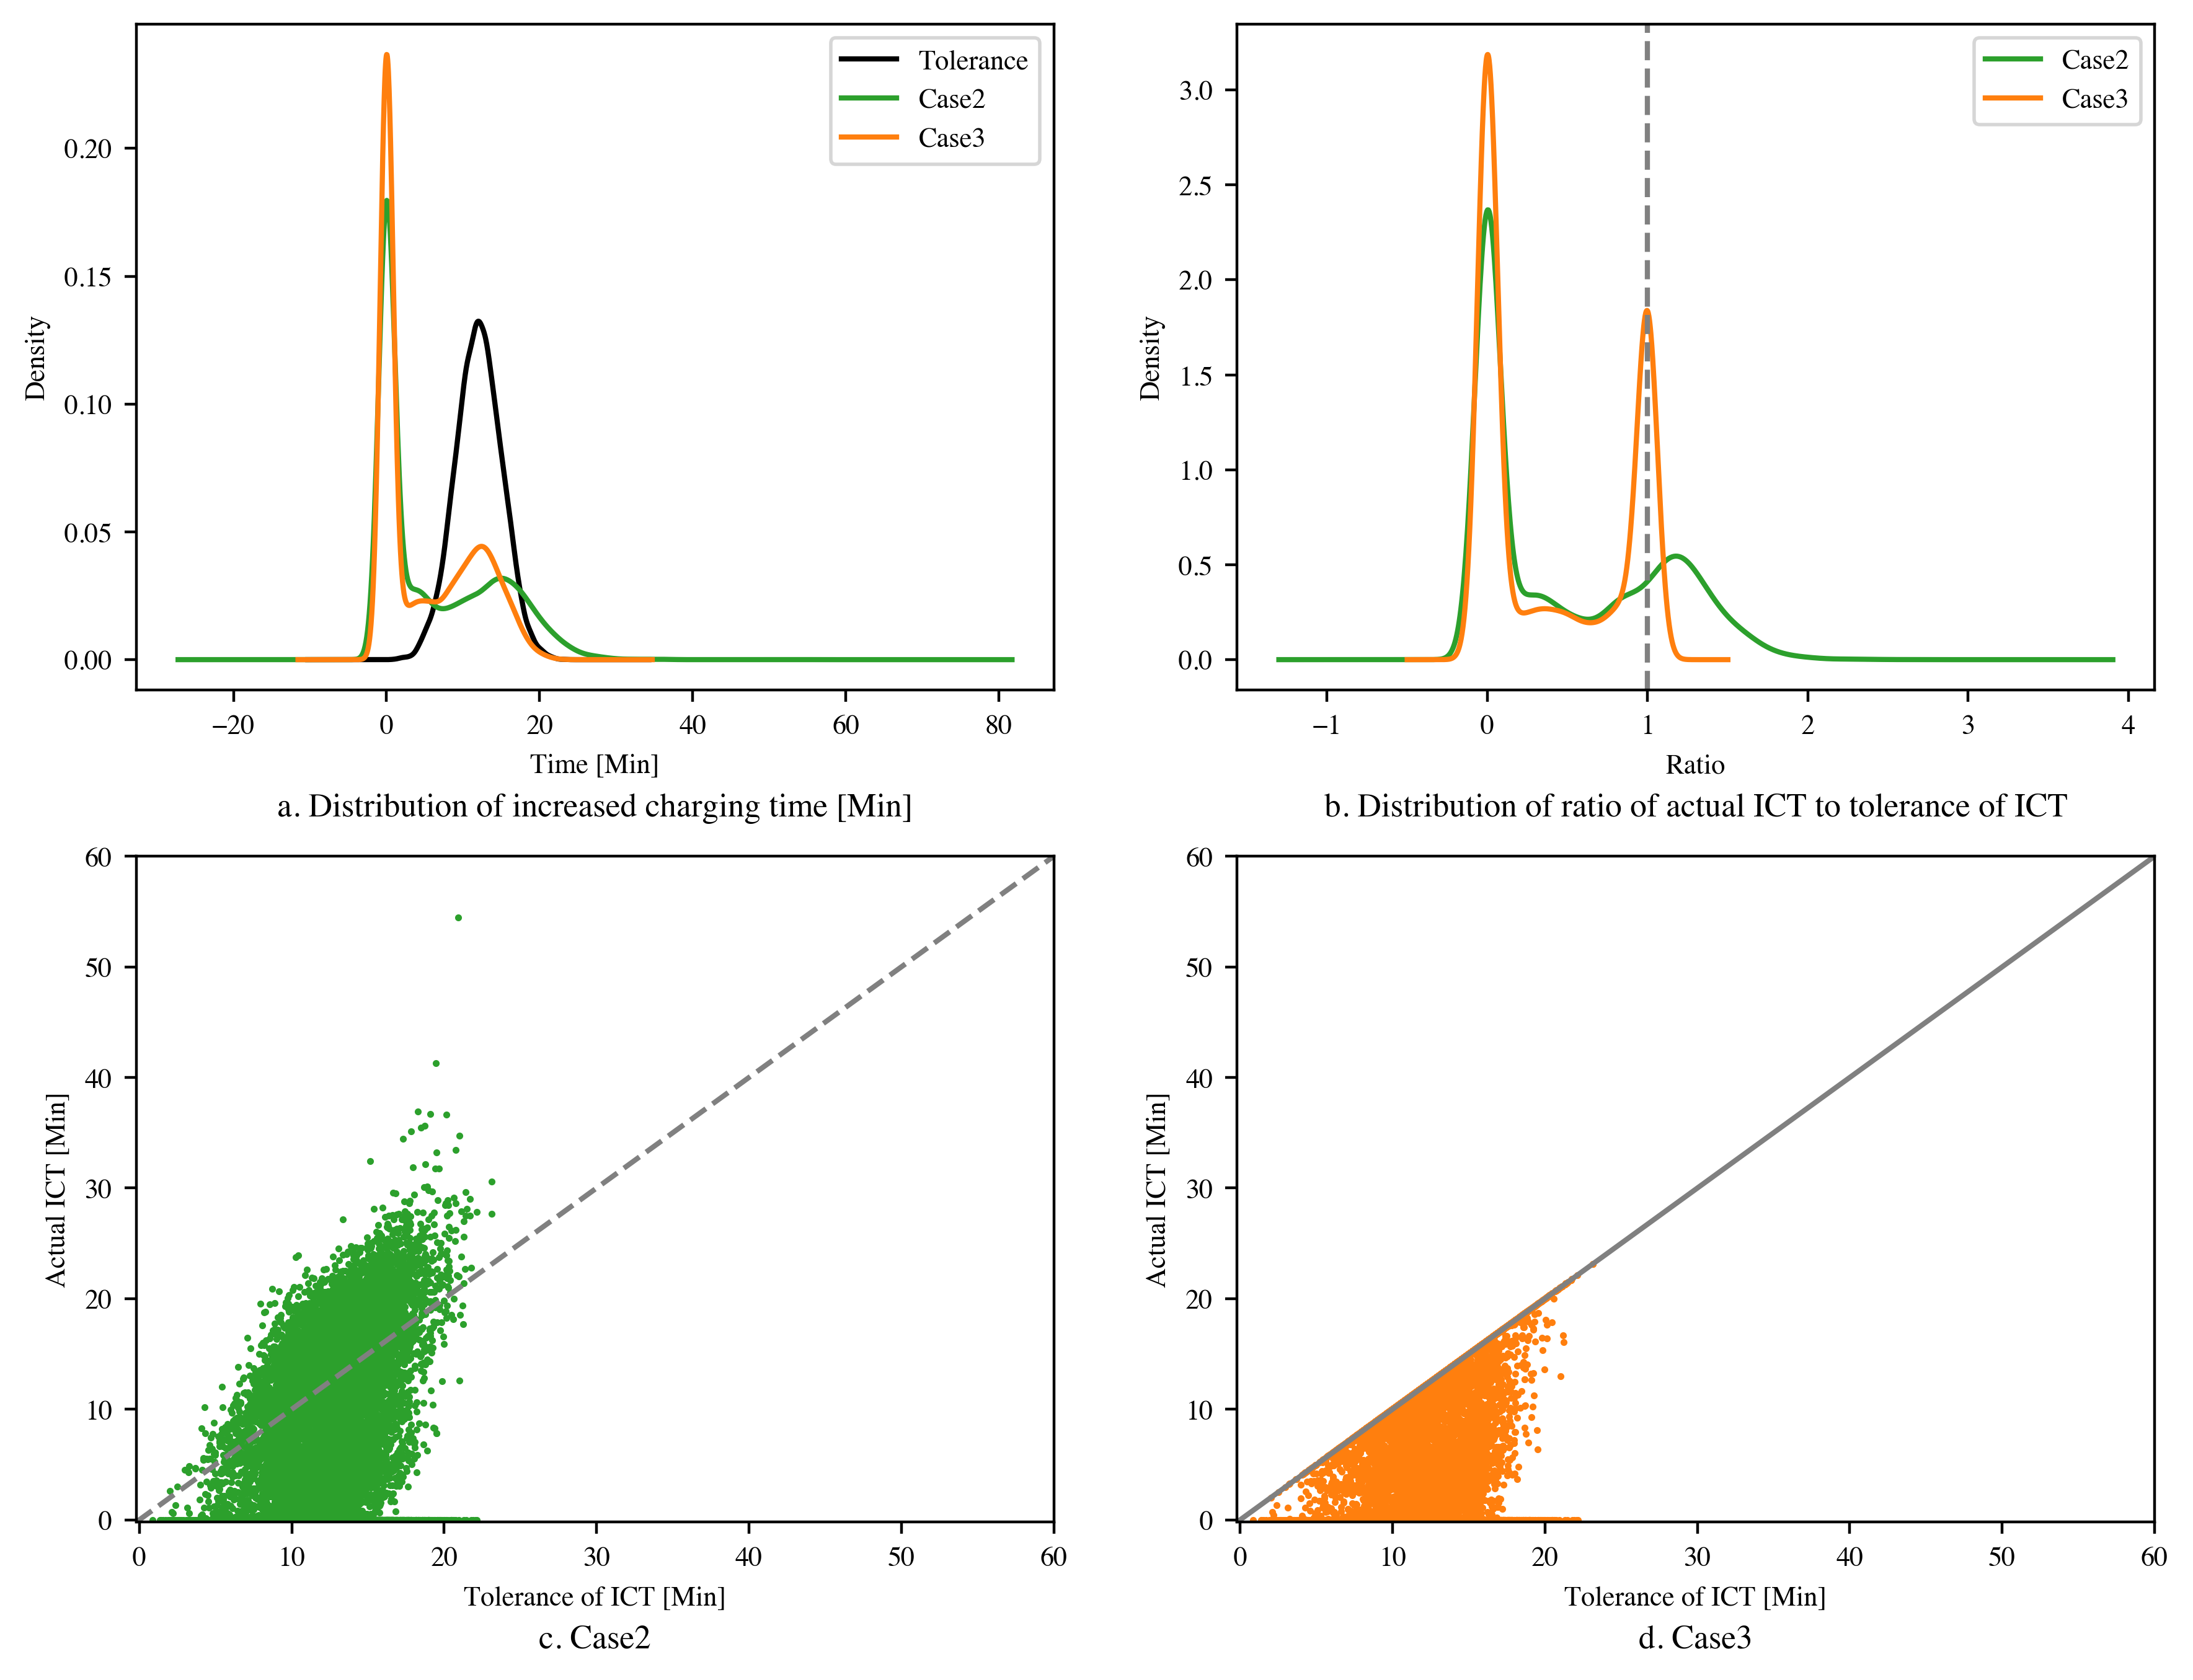

In [16]:
evdfnp = evdfn.copy()
evdfp = evdf.copy()
# # scale up data
evdfnp[['tt', 'ict']] *= 60
evdfp[['tt', 'ict']] *= 60
# # re-calculate ict
evdfnp['ict'] = evdfnp['na'] / evdfnp['nam'] * evdfnp['tt']
evdfnp['ict'][evdfnp['ict'] < 0] = 0
evdfp['ict'] = evdfp['na'] / evdfp['nam'] * evdfp['tt']
evdfp['ict'][evdfp['ict'] < 0] = 0

# # ratio of ict
evdfnp['rict'] = evdfnp['ict'] / evdfnp['tt']
evdfp['rict'] = evdfp['ict'] / evdfp['tt']

# # --- plot ---
fig_t1, ax_t1 = plt.subplots(2, 2, figsize=(10.5, 8), dpi=400)
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.2, hspace=0.25)
title_y = -0.22
# --- plot1 ---
ax = ax_t1[0, 0]
evdfnp['tt'].plot.kde(ax=ax, color='black', label='Tolerance')
evdfnp['ict'].plot.kde(ax=ax, color='tab:green', label='Case2', linestyle='-')
evdfp['ict'].plot.kde(ax=ax, color='tab:orange', label='Case3', linestyle='-')
ax.legend()
ax.set_xlabel('Time [Min]')
ax.set_ylabel('Density')
ax.set_title('a. Distribution of increased charging time [Min]', y=title_y)

# --- plot2 ---
ax = ax_t1[0, 1]
evdfnp['rict'].plot.kde(ax=ax, color='tab:green', label='Case2', linestyle='-')
evdfp['rict'].plot.kde(ax=ax, color='tab:orange', label='Case3', linestyle='-')
ax.legend()
ax.set_xlabel('Ratio')
ax.set_ylabel('Density')
ax.set_title('b. Distribution of ratio of actual ICT to tolerance of ICT', y=title_y)
ax.axvline(x=1, color='grey', linestyle='--')

# --- plot3,4 ---
ax, s, marker, x, y = ax_t1[1, 0], 1, 'o', 'tt', 'ict'
xmax, xmin, loc =  60, -0.2, 'bottom'

evdfnp.plot.scatter(x=x, y=y, s=s, marker=marker, ax=ax,
                   c='tab:green', label='Case2')
ax.plot([xmin, xmax], [xmin, xmax], color='grey', linestyle='--')
ax.get_legend().remove()
ax.set_xlim([xmin, xmax])
ax.set_ylim([xmin, xmax])
ax.set_xlabel('Tolerance of ICT [Min]')
ax.set_ylabel('Actual ICT [Min]')
ax.set_title('c. Case2', y=title_y)

ax, s, marker, x, y, xmax, xmin = ax_t1[1, 1], 1, 'o', 'tt', 'ict', 60, -0.2
evdfp.plot.scatter(x=x, y=y, s=s, marker=marker, ax=ax,
                  c='tab:orange', label='Case3')
ax.plot([xmin, xmax], [xmin, xmax], color='grey', linestyle='-')
ax.get_legend().remove()
ax.set_xlim([xmin, xmax])
ax.set_ylim([xmin, xmax])
ax.set_xlabel('Tolerance of ICT [Min]')
ax.set_ylabel('Actual ICT [Min]')
ax.set_title('d. Case3', y=title_y)

# fig_t1.suptitle('EV increased charging time (ICT)', x=0.2, y=0.03, fontsize=12)